# Real Estate Prices Analysis 

## Multi-Linear Regression

## <small> Business Understanding</small>

### <small> Introduction</small>

The core objective of this project is to conduct a comprehensive analysis of house sales data using multiple regression modeling techniques. Through the application of multiple regression, our aim is to ascertain and quantify the relationships between various factors or predictors and house sale prices. This analysis will yield valuable insights into the primary drivers of house prices, facilitating well-informed decision-making for stakeholders involved in real estate investment. An illustrative example includes homeowners and sellers, who can utilize the regression model to estimate the potential value of their properties. By taking into account the influential features identified in the regression analysis, they can evaluate the effects of specific improvements or renovations on property prices and, in turn, make informed choices pertaining to pricing and marketing strategies.

### <small>  Problem Statement</small>

This project aims to underscore the significance of identifying the factors that have a substantial impact on house prices. Conventional approaches often depend on testimonial evidence or limited analysis, leading to unreliable insights. This information gap impedes stakeholders' capacity to accurately anticipate and comprehend house price fluctuations. To resolve this issue, we advocate the comprehensive utilization of multiple regression modeling techniques for the analysis of house sales data. Through multiple regression, we can uncover the relationships between various factors and house sale prices, while considering the combined influence of numerous independent variables.

### <small> Main Objective</small>

To use multiple regression modeling techniques to analyze house sales data with the aim of identifying and quantifying the influential factors affecting house sales prices. This analysis will empower stakeholders to make informed, data-driven decisions concerning their real estate investments.

### <small> General Objectives</small>

1. Perform explanatory data analysis to gain insights into the relationships between different variables and the target variable, facilitating the selection of relevant variables for the regression model.

2. Develop a multiple regression model for predicting house sale prices, taking into account the chosen independent variables and their influence on the dependent variable. Validate the model assumptions, assess its goodness of fit, and make refinements as necessary.

3. Interpret the coefficients of the independent variables within the model to determine their individual impact on house prices. Identify the most influential factors driving house sale prices and describe their respective effects.

4. Evaluate and validate the model's performance to ensure its accuracy and reliability.

5. Provide actionable insights and recommendations based on the analysis to assist real estate investors and policymakers in making informed decisions regarding property investments, understanding market trends, and contributing to effective economic planning.

### <small>  Data Understanding</small>

The dataset utilized in this project encompasses information related to the factors influencing housing prices. It includes variables such as date, sqft_above, view, and sqft_basement. The process of explanatory data analysis is employed to comprehensively understand the dataset. This involves tasks such as identifying missing values, examining data types, detecting outliers, and extracting pertinent features for subsequent analysis.

##  Loading the data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline


 # Visualize in the notebook
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression # for creating and training datasets
from sklearn.metrics import mean_squared_error, r2_score #Evaluate model performance
import statsmodels.api as sm # create models
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("kc_house_data.csv")

# See the head of the dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/09/2014,538000,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/09/2014,604000,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


##  Data cleaning

In [3]:
# Check for null values
pd.DataFrame(df.isna().sum()).T

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,2376,63,...,0,0,0,0,3842,0,0,0,0,0


In [4]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [5]:
# Mode imputation
df['waterfront'] = df['waterfront'].fillna(df['waterfront'].mode().iloc[0])

In [6]:
df['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [7]:
# Deal with missing values in the view column
# Check for the counts of different categories
df['view'].value_counts()



NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [8]:
# check forthe count unique values in the year renoveted column 
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [9]:
# Replace null with the most frequent value
df['yr_renovated'].fillna(0,inplace=True)

In [10]:
#iterate through the columns to see the frequency of different values
for i in df.columns:
    print(df[i].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
6/23/2014     142
6/26/2014     131
6/25/2014     131
07/08/2014    127
4/27/2015     126
             ... 
5/24/2015       1
11/30/2014      1
8/30/2014       1
5/27/2015       1
5/17/2014       1
Name: date, Length: 372, dtype: int64
450000    172
350000    172
550000    159
500000    152
425000    150
         ... 
788600      1
700180      1
436300      1
329800      1
435010      1
Name: price, Length: 3622, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71


In [11]:
# Drop rows with '?' in 'sqft_basement'
df = df[df['sqft_basement'] != '?']

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

In [12]:
# Convert 'sqft_basement' column to float
df['sqft_basement'] = df['sqft_basement'].astype(float)

##  Explanatory Data Analysis

In [13]:
# Check the shape of the dataset
print(f"Shape of df is : {df.shape}")

Shape of df is : (21143, 21)


In [14]:
# Overview of the dataset
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21143 entries, 0 to 21142
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  int64  
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  object 
 9   view           21082 non-null  object 
 10  condition      21143 non-null  object 
 11  grade          21143 non-null  object 
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   21143 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  f

In [15]:
# Statistical distribution of the dataset
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.114300e+04  2.114300e+04  21143.000000  21143.000000  21143.000000   
mean   4.581004e+09  5.405107e+05      3.372558      2.116079   2080.920730   
std    2.876328e+09  3.680751e+05      0.924917      0.768531    918.547562   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904940e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.309100e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above  sqft_basement      yr_built  \
count  2.114300e+04  21143.000000  21143.000000   21143.000000  21143.000000   
mean   1.508714e+04      1.493591   1789.069006     291.851724   1971.023223   
std    4.120920e+04      0.

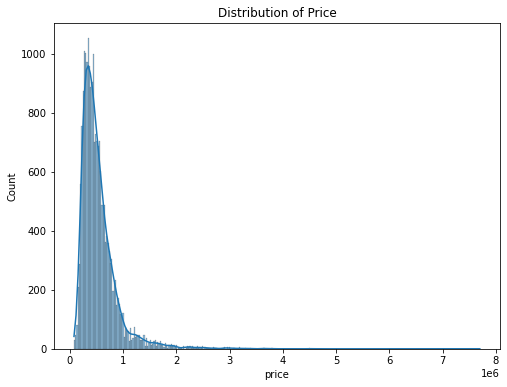

In [16]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='price', kde=True)
plt.title("Distribution of Price")
plt.show()

The diagram shows a positively skewed distribution of the price

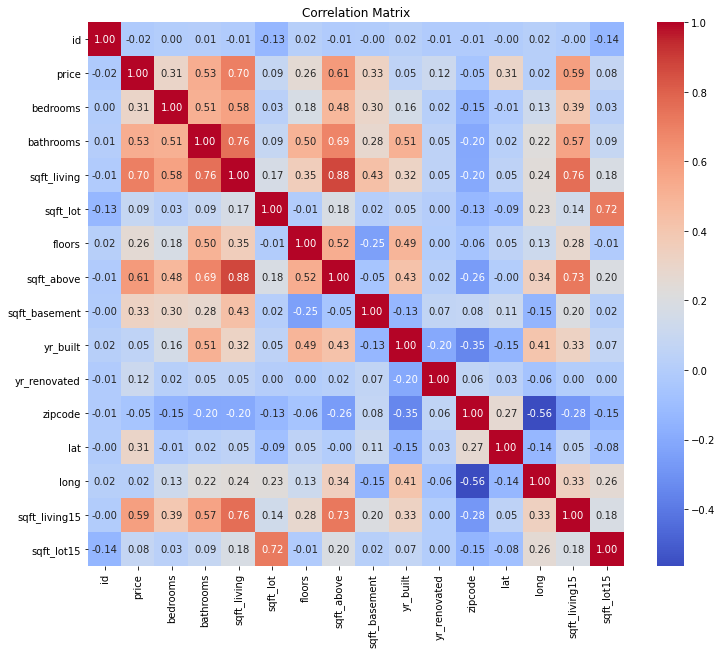

In [17]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

We have so many numbers on the heatmap but we are only interested in the large values that are equal or more than 0.75

In [18]:
s = df.corr().unstack()
so = s.where((s >= 0.75) & (s < 1)).dropna().sort_values(kind="quicksort", ascending=False)
print(so)

sqft_above     sqft_living      0.876678
sqft_living    sqft_above       0.876678
sqft_living15  sqft_living      0.756389
sqft_living    sqft_living15    0.756389
               bathrooms        0.755278
bathrooms      sqft_living      0.755278
dtype: float64


This will check for multicollinearity within independent variables. High multicollinearity might lead to poor performance of our model

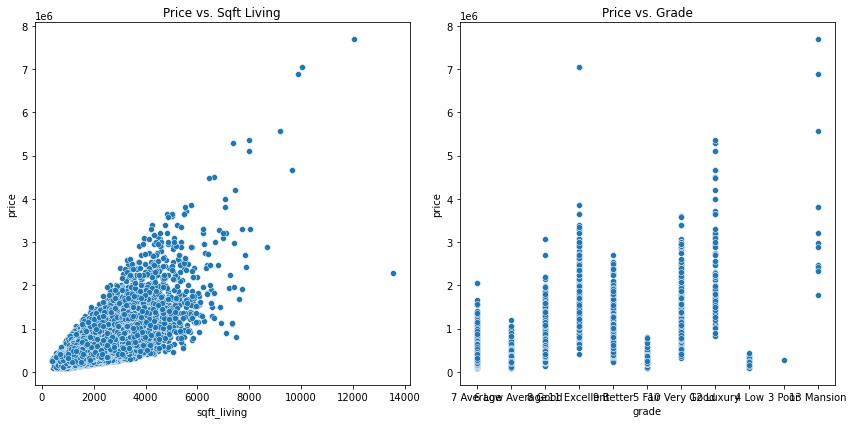

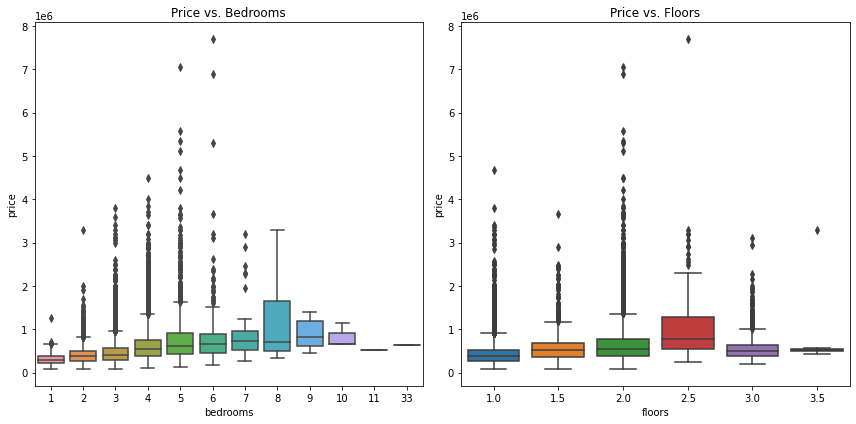

In [19]:
# Scatter plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.title("Price vs. Sqft Living")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='grade', y='price')
plt.title("Price vs. Grade")

plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='bedrooms', y='price')
plt.title("Price vs. Bedrooms")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='floors', y='price')
plt.title("Price vs. Floors")

plt.tight_layout()
plt.show()

###  Encoding Categorical Columns in the Data

In [20]:
# Define the order of the categories
category_order = {
    'NO': 0,
    "YES" : 1
}

# Perform ordinal encoding on the "waterfront" column
df["waterfront_encoded"] = df["waterfront"].map(category_order)

# Replace the original "waterfront" column with the encoded values
df["waterfront"] = df["waterfront_encoded"]

# Check the updated dataset
df['waterfront'].value_counts()



0    21001
1      142
Name: waterfront, dtype: int64

In [21]:
# Let's check the count of the encoded column of waterfront
df['waterfront'].value_counts()

0    21001
1      142
Name: waterfront, dtype: int64

In [22]:
# Encode the column view
# Define the order of the categories
category_order = {
    "NONE": 0,
    "AVERAGE": 1,
    "GOOD": 2,
    "FAIR": 3,
    "EXCELLENT": 4
}

# Perform ordinal encoding on the "view" column
df["view_encoded"] = df["view"].map(category_order)

# Replace the original "view" column with the encoded values
df["view"] = df["view_encoded"]

# Check the updated dataset
df['view'].value_counts()


0.0    19018
1.0      930
2.0      496
3.0      327
4.0      311
Name: view, dtype: int64

In [23]:
# Let's encode the condition column 
# Define the order of the categories
category_order = {
    "Poor": 1,
    "Fair": 2,
    "Average": 3,
    "Good": 4,
    "Very Good": 5
}

# Perform ordinal encoding on the "condition" column
df["condition_encoded"] = df["condition"].map(category_order)

# Replace the original "condition" column with the encoded values
df["condition"] = df["condition_encoded"]

# Check the updated dataset
df['condition'].value_counts()

3    13726
4     5557
5     1666
2      166
1       28
Name: condition, dtype: int64

In [24]:
# Encode the grade column
# Define the order of the categories
category_order = {
    "3 Poor": 3,
    "5 Fair": 5,
    "4 Low": 4,
    "6 Low Average": 6,
    "7 Average": 7,
    "8 Good": 8,
    "9 Better": 9,
    "10 Very Good": 10,
    "11 Excellent": 11,
    "12 Luxury": 12,
    "13 Mansion": 13
}

# Perform ordinal encoding on the "grade" column
df["grade_encoded"] = df["grade"].replace(category_order)

# Replace the original "grade" column with the encoded values
df["grade"] = df["grade_encoded"]

# Check the updated dataset
df['grade'].value_counts()

7     8788
8     5933
9     2557
6     1997
10    1112
11     391
5      235
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [25]:
# View the encoded dataset
df_encoded = df
df_encoded

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_encoded,view_encoded,condition_encoded,grade_encoded
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0,0.0,...,0.0,98178,47.5112,-122.257,1340,5650,0,0.0,3,7
1,6414100192,12/09/2014,538000,3,2.25,2570,7242,2.0,0,0.0,...,1991.0,98125,47.7210,-122.319,1690,7639,0,0.0,3,7
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0,0.0,...,0.0,98028,47.7379,-122.233,2720,8062,0,0.0,3,6
3,2487200875,12/09/2014,604000,4,3.00,1960,5000,1.0,0,0.0,...,0.0,98136,47.5208,-122.393,1360,5000,0,0.0,5,7
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0,0.0,...,0.0,98074,47.6168,-122.045,1800,7503,0,0.0,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21138,263000018,5/21/2014,360000,3,2.50,1530,1131,3.0,0,0.0,...,0.0,98103,47.6993,-122.346,1530,1509,0,0.0,3,8
21139,6600060120,2/23/2015,400000,4,2.50,2310,5813,2.0,0,0.0,...,0.0,98146,47.5107,-122.362,1830,7200,0,0.0,3,8
21140,1523300141,6/23/2014,402101,2,0.75,1020,1350,2.0,0,0.0,...,0.0,98144,47.5944,-122.299,1020,2007,0,0.0,3,7
21141,291310100,1/16/2015,400000,3,2.50,1600,2388,2.0,0,0.0,...,0.0,98027,47.5345,-122.069,1410,1287,0,0.0,3,8


In [26]:
# Convert "yr_renovated" column to integer
df_encoded["yr_renovated"] = df_encoded["yr_renovated"].astype(int)

In [27]:
# Drop the encoded columns
df_updated= df_encoded.drop(["waterfront_encoded", "view_encoded", "condition_encoded", "grade_encoded"], axis=1)

# Check the updated dataset
df_updated

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0,0.0,...,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/09/2014,538000,3,2.25,2570,7242,2.0,0,0.0,...,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0,0.0,...,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/09/2014,604000,4,3.00,1960,5000,1.0,0,0.0,...,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0,0.0,...,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21138,263000018,5/21/2014,360000,3,2.50,1530,1131,3.0,0,0.0,...,8,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509
21139,6600060120,2/23/2015,400000,4,2.50,2310,5813,2.0,0,0.0,...,8,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200
21140,1523300141,6/23/2014,402101,2,0.75,1020,1350,2.0,0,0.0,...,7,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007
21141,291310100,1/16/2015,400000,3,2.50,1600,2388,2.0,0,0.0,...,8,1600,0.0,2004,0,98027,47.5345,-122.069,1410,1287


In [28]:
# Check the correlation between the independent factors and the target variable house prices
pd.DataFrame(df_updated.corr()['price']).sort_values(by='price',ascending=False)

,price
price,1.000000
sqft_living,0.702328
grade,0.667738
sqft_above,0.605143
sqft_living15,0.586415
bathrooms,0.525889
view,0.390112
sqft_basement,0.325008
bedrooms,0.309204
lat,0.306507


From the results above sqft_living has the highest positive correlation coefficient (0.702328), indicating a relatively strong positive linear relationship with the price of a property. As the square footage of the living area increases, the price tends to increase as well.
sqft_above also has a positive correlation coefficient of 0.605368, indicating a moderately strong positive linear relationship with the price. It represents the square footage of the interior living space above ground level.
sqft_lot has a weak positive correlation coefficient of 0.089876. It represents the square footage of the land area of the property.
id: This feature has a weak negative correlation coefficient of -0.016772. It represents the identifier of the property, which is not meaningful in terms of correlation with price.
zipcode has a weak negative correlation coefficient of -0.053402. It represents the zipcode of the property, which also does not show a strong correlation with price.

Keep in mind that correlation does not imply causation. These correlation coefficients only indicate the linear relationship between the features and the price in the dataset, and there may be other factors not captured in the dataset that affect the price of a property

###  Formating Date Types

In [29]:
# Drop rows with invalid dates
df_updated = df_updated.dropna(subset=['date'])

# Convert the date column to datetime
df_updated['date'] = pd.to_datetime(df_updated['date'])

# Calculate years since built
df_updated['years_since_built'] = df_updated['date'].dt.year - df_updated['yr_built']

# Calculate years to renovation
df_updated['years_since_renovation'] =np.abs(df_updated['yr_renovated']- df_updated['yr_built']) 
df_updated['years_since_renovation'] = df_updated.years_since_renovation.apply(lambda x: x if len(str(int(x)))==2 else 0.0)


# Check the updated dataset
df_updated

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_built,years_since_renovation
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0.0,...,0.0,1955,0,98178,47.5112,-122.257,1340,5650,59,0.0
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0.0,...,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,63,40.0
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0.0,...,0.0,1933,0,98028,47.7379,-122.233,2720,8062,82,0.0
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0.0,...,910.0,1965,0,98136,47.5208,-122.393,1360,5000,49,0.0
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0.0,...,0.0,1987,0,98074,47.6168,-122.045,1800,7503,28,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21138,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,0.0,...,0.0,2009,0,98103,47.6993,-122.346,1530,1509,5,0.0
21139,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,0.0,...,0.0,2014,0,98146,47.5107,-122.362,1830,7200,1,0.0
21140,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,0.0,...,0.0,2009,0,98144,47.5944,-122.299,1020,2007,5,0.0
21141,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,0.0,...,0.0,2004,0,98027,47.5345,-122.069,1410,1287,11,0.0


In [30]:
# Replace values greater than 50 in years_since_renovation with years_since_built
df_updated.loc[df_updated['years_since_renovation'] > 100, 'years_since_renovation'] = df_updated['years_since_built']

# Check the updated dataset
df_updated
# This will take into account the huge numbers that comes as a result of having a 0 as our time of renovation, so we will take the time since building as our time since renovation

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_built,years_since_renovation
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0.0,...,0.0,1955,0,98178,47.5112,-122.257,1340,5650,59,0.0
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0.0,...,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,63,40.0
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0.0,...,0.0,1933,0,98028,47.7379,-122.233,2720,8062,82,0.0
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0.0,...,910.0,1965,0,98136,47.5208,-122.393,1360,5000,49,0.0
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0.0,...,0.0,1987,0,98074,47.6168,-122.045,1800,7503,28,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21138,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,0.0,...,0.0,2009,0,98103,47.6993,-122.346,1530,1509,5,0.0
21139,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,0.0,...,0.0,2014,0,98146,47.5107,-122.362,1830,7200,1,0.0
21140,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,0.0,...,0.0,2009,0,98144,47.5944,-122.299,1020,2007,5,0.0
21141,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,0.0,...,0.0,2004,0,98027,47.5345,-122.069,1410,1287,11,0.0


###  Feature Engineering

In [31]:
# Extract the month from the 'date' column
df_updated['month'] = df_updated['date'].dt.month

# Map the month values to corresponding seasons
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
           7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
df_updated['season'] = df_updated['month'].map(seasons)

# Drop the 'date' and 'month' columns
df_updated = df_updated.drop(['date', 'month'], axis=1)

In [32]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21142
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      21143 non-null  int64  
 1   price                   21143 non-null  int64  
 2   bedrooms                21143 non-null  int64  
 3   bathrooms               21143 non-null  float64
 4   sqft_living             21143 non-null  int64  
 5   sqft_lot                21143 non-null  int64  
 6   floors                  21143 non-null  float64
 7   waterfront              21143 non-null  int64  
 8   view                    21082 non-null  float64
 9   condition               21143 non-null  int64  
 10  grade                   21143 non-null  int64  
 11  sqft_above              21143 non-null  int64  
 12  sqft_basement           21143 non-null  float64
 13  yr_built                21143 non-null  int64  
 14  yr_renovated            21143 non-null

In [33]:
df_updated['season'].unique()

array(['Fall', 'Winter', 'Spring', 'Summer'], dtype=object)

In [34]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a pandas DataFrame called 'df' containing the dataset

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the 'season' column and transform the values
df_updated['season_encoded'] = encoder.fit_transform(df_updated['season'])

# Drop the original 'season' column
df_updated = df_updated.drop('season', axis=1)

###  Dropping Irrelevant Columns

In [35]:
df_updated.drop(['id','yr_built','yr_renovated','zipcode','long'], axis=1,inplace=True)
df_updated.head()
# We are dropping ID as it is a unique indentifier

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,sqft_living15,sqft_lot15,years_since_built,years_since_renovation,season_encoded
0,221900,3,1.00,1180,5650,1.0,0,0.0,3,7,1180,0.0,47.5112,1340,5650,59,0.0,0
1,538000,3,2.25,2570,7242,2.0,0,0.0,3,7,2170,400.0,47.7210,1690,7639,63,40.0,3
2,180000,2,1.00,770,10000,1.0,0,0.0,3,6,770,0.0,47.7379,2720,8062,82,0.0,3
3,604000,4,3.00,1960,5000,1.0,0,0.0,5,7,1050,910.0,47.5208,1360,5000,49,0.0,3
4,510000,3,2.00,1680,8080,1.0,0,0.0,3,8,1680,0.0,47.6168,1800,7503,28,0.0,3


df_updated.info()

In [36]:
df_updated.corr()['price']

price                     1.000000
bedrooms                  0.309204
bathrooms                 0.525889
sqft_living               0.702328
sqft_lot                  0.087937
floors                    0.256355
waterfront                0.265969
view                      0.390112
condition                 0.035290
grade                     0.667738
sqft_above                0.605143
sqft_basement             0.325008
lat                       0.306507
sqft_living15             0.586415
sqft_lot15                0.083192
years_since_built        -0.054382
years_since_renovation    0.109440
season_encoded           -0.008051
Name: price, dtype: float64

##  Regression Model

###  Baseline Model

In [37]:

# Drop the 'price' column and features that would result in major errors
X = df_updated.drop(['price'], axis=1)  # Exclude 'id' as it is a unique identifier

# Handle missing values if any exist
X = X.fillna(0)  # Fill missing values with 0, but you may use other strategies

# Encode categorical variables if necessary
# ...

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df_updated['price'], test_size=0.2, random_state=42)

# Create a baseline model using multiple linear regression
baseline_model = LinearRegression()

# Fit the model on the training data
baseline_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = baseline_model.predict(X_test)

# Evaluate the model using appropriate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Baseline Model Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Baseline Model Metrics:
Mean Squared Error (MSE): 40225724409.6237
R-squared (R2) Score: 0.694931802370665


The mean squared error (MSE) measures the average squared difference between the predicted and actual values. In this case, the MSE value of 40225724409.623314 indicates that, on average, the predicted prices from the model differ from the actual prices by approximately $40,225,724,409.62 (in the squared units of the target variable). A lower MSE indicates better performance, as it signifies less deviation between the predicted and actual values.

The R-squared (R2) score is a statistical measure that represents the proportion of variance in the target variable that can be explained by the independent variables in the model. The R2 score ranges from 0 to 1, where a value closer to 1 indicates a better fit. In our baseline model, the R2 score of 0.6949318023706679 suggests that approximately 69.5% of the variance in the target variable 'price' can be explained by the features included in the model.


These metrics provide an initial evaluation of the baseline model's performance. However, there is room for improvement, and we can now proceed with model iterations to enhance the model's predictive power.


##  Model Iterations

Let's check the correlation between the variables with respect to the dependent variable, price.

In [38]:
df_updated.corr()['price']

price                     1.000000
bedrooms                  0.309204
bathrooms                 0.525889
sqft_living               0.702328
sqft_lot                  0.087937
floors                    0.256355
waterfront                0.265969
view                      0.390112
condition                 0.035290
grade                     0.667738
sqft_above                0.605143
sqft_basement             0.325008
lat                       0.306507
sqft_living15             0.586415
sqft_lot15                0.083192
years_since_built        -0.054382
years_since_renovation    0.109440
season_encoded           -0.008051
Name: price, dtype: float64

###  Relationship between Predictor Variables

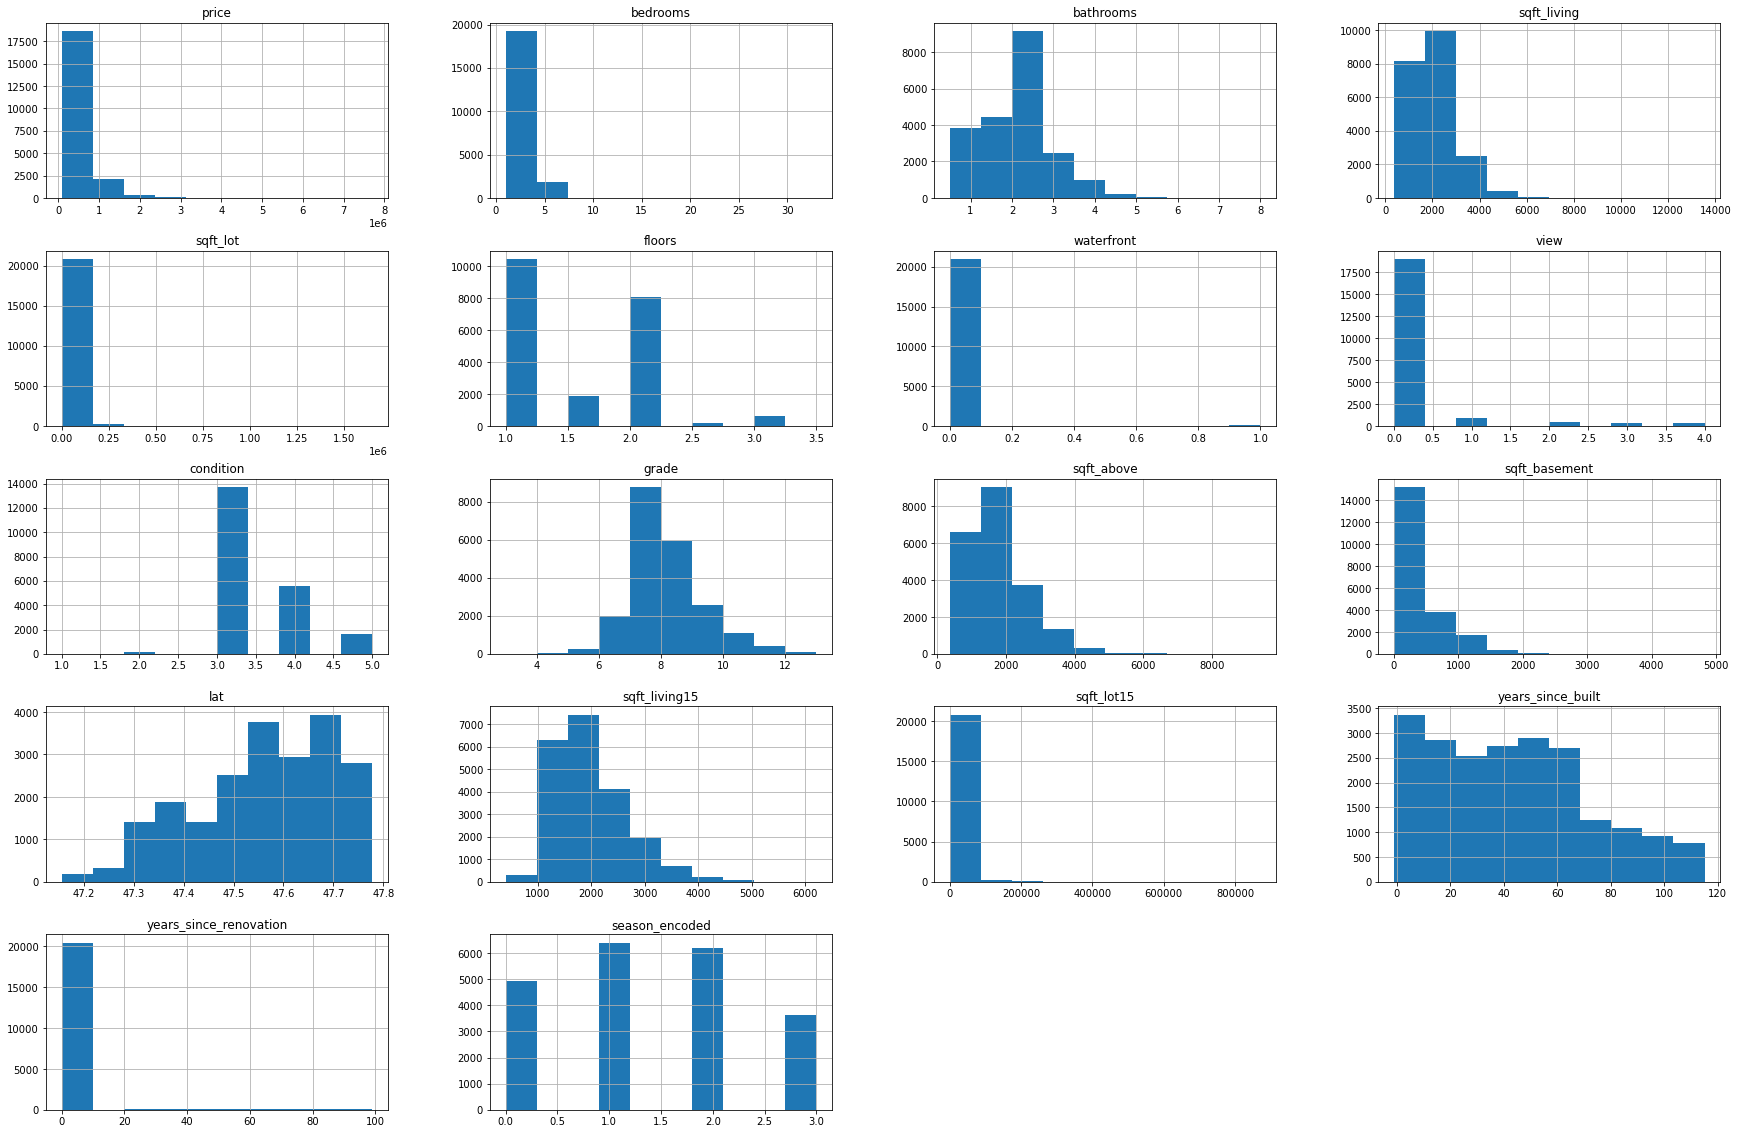

In [39]:
# plot the frequency for the data columns
df_updated.hist(figsize=(30,20))
plt.show()

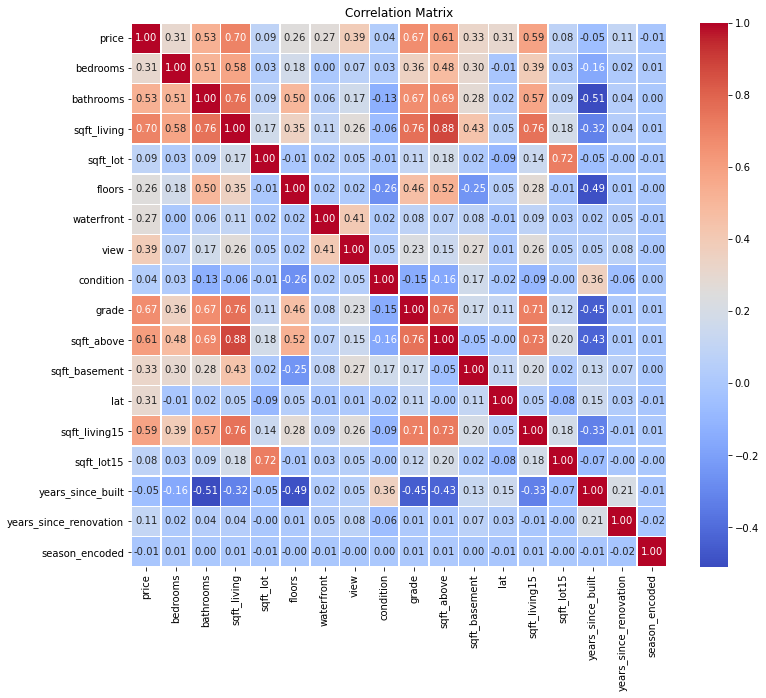

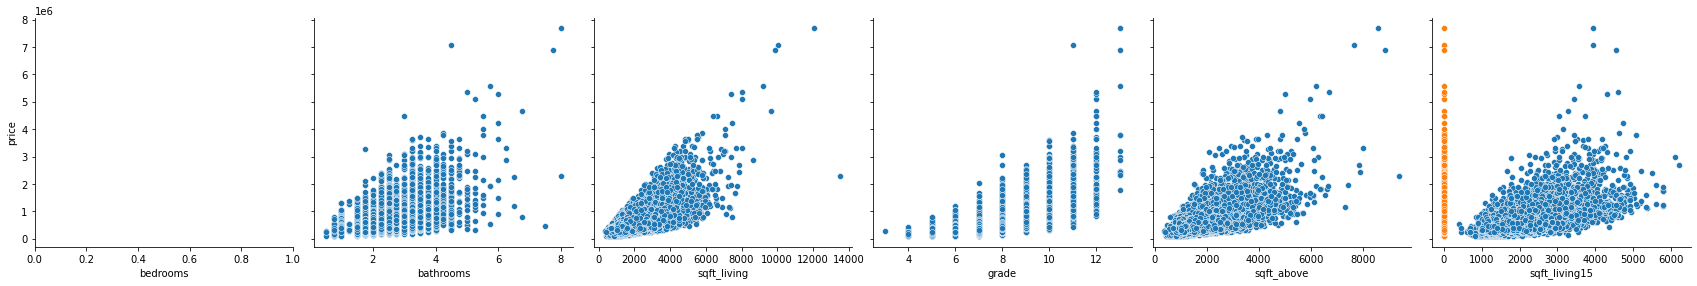

In [40]:
# Create a correlation matrix
corr_matrix = df_updated.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

# Show the scatter plot for the target variable ('price') with the highly correlated features
features = ['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']
sns.pairplot(df_updated, y_vars=['price'], x_vars=features, height=4)

# Show the scatter plot for the target variable ('price') with the season_encoded feature
sns.scatterplot(data=df_updated, x='season_encoded', y='price')

plt.show()

We can see that the predictors with high correlation with the dependent variable have nearly linear relationship with the dependent variable

### b) Outliers Identification

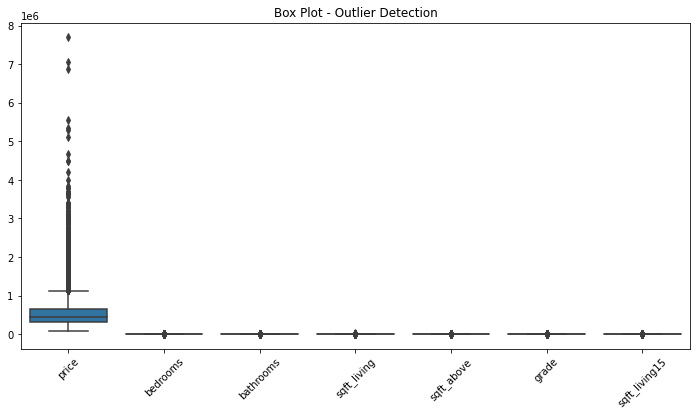

Outliers:
         price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
5      1230000         4       4.50         5420    101930     1.0   
19     2000000         3       2.75         3050     44867     1.0   
147    2250000         4       3.25         5180     19850     2.0   
239    2400000         4       2.50         3650      8354     1.0   
262    2900000         4       3.25         5050     20100     1.5   
...        ...       ...        ...          ...       ...     ...   
21092   750000         5       4.00         4500      8130     2.0   
21099  1700000         4       3.50         3830      8963     2.0   
21107  3570000         5       4.50         4850     10584     2.0   
21121  1220000         4       3.50         4910      9444     1.5   
21130  1540000         5       3.75         4470      8088     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement      lat  \
5               0   0.0          3     11        3890         1530.0

In [41]:
# Create box plots to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_updated[['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_above','grade','sqft_living15']])
plt.title('Box Plot - Outlier Detection')
plt.xticks(rotation=45)
plt.show()

# Calculate z-scores for numerical features
numeric_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_above','grade','sqft_living15']
z_scores = df[numeric_features].apply(lambda x: (x - x.mean()) / x.std())

# Identify outliers based on z-score threshold (e.g., z-score > 3 or z-score < -3)
outliers = df_updated[(z_scores > 3).any(axis=1)]

# Print the outliers
print('Outliers:')
print(outliers)

From the boxplots we can see some particles of outliers but with our data,especially from the prices, the outliers seems to be equally important!

### c) Feature selection

In [42]:
from sklearn.feature_selection import SelectKBest, f_regression
# Set threshold for correlation coefficient
threshold = 0.7

# Find highly correlated features
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

# Remove highly correlated features
selected_features = [col for col in df_updated.columns if col not in correlated_features]

# Select K best features using SelectKBest with f_regression scoring
k = 10  # Number of features to select
X = df_updated[selected_features].drop('price', axis=1)  # Input features
y = df_updated['price']  # Target variable
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X, y)
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

# Print the selected features
print('Selected Features:')
print(selected_features)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### d) Split Data

In [ ]:
X = df_updated[['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'sqft_basement', 'lat', 'years_since_built', 'years_since_renovation','grade']] # independent variables
y = df_updated.price.values # dependent variable

### e) Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sn = StandardScaler()
X_variables = sn.fit_transform(X)
X_variables

array([[-0.40281161, -0.9808333 , -0.22901102, ...,  0.53540409,
        -0.17034102, -0.56060742],
       [-0.40281161,  0.53246109, -0.19037796, ...,  0.67181446,
         3.66923278, -0.56060742],
       [-1.48401584, -1.42720071, -0.12344957, ...,  1.31976372,
        -0.17034102, -1.41223285],
       ...,
       [-1.48401584, -1.15502546, -0.33335912, ..., -1.30613591,
        -0.17034102, -0.56060742],
       [-0.40281161, -0.52357888, -0.30816997, ..., -1.10152035,
        -0.17034102,  0.29101801],
       [-1.48401584, -1.15502546, -0.34000828, ..., -1.27203332,
        -0.17034102, -0.56060742]])

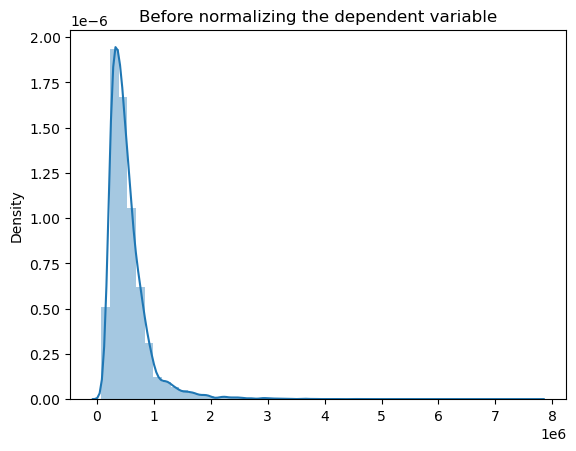

In [ ]:
# Lets check the distribution of the dependent variable
sns.distplot(y);
plt.xticks(rotation=0);

plt.title("Before normalizing the dependent variable");

This is the distribution of our dependent variable before normalization.
We see a highly positively skewed distribution of y variable

This is called  bell-shaped distribution


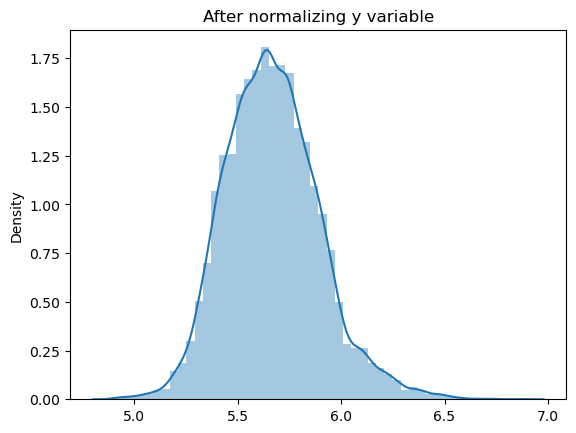

In [ ]:
y = np.log10(y)
#we just normalized the y variable using log10 which is available in numpy package 
#now lets plot the data

sns.distplot(y);
plt.xticks(rotation=0);
plt.title("After normalizing y variable");
print("This is called  bell-shaped distribution")

### g) Train-Test Split

In [ ]:
X_train ,X_test , y_train ,y_test = train_test_split(X_variables,y,test_size=0.2,random_state=10)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape) #printing the shape of splited data

(16914, 11) (4229, 11) (16914,) (4229,)


### h) Regression Model

In [ ]:
# Create a baseline model using multiple linear regression
baseline_model = LinearRegression()

# Fit the model on the training data
baseline_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = baseline_model.predict(X_test)

# Evaluate the model using appropriate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Baseline Model Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Baseline Model Metrics:
Mean Squared Error (MSE): 0.01258569920573706
R-squared (R2) Score: 0.7507581914757646


In [ ]:
# the intercept 
# Create a Linear Regression object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the intercept
intercept = model.intercept_

print("Intercept:", intercept)

Intercept: 5.66726621045027


In [ ]:
# Lets test for overfitting
# Make predictions on the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate the mean squared error on the training and testing data
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Calculate the coefficient of determination (R^2) on the training and testing data
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R^2:", train_r2)
print("Testing R^2:", test_r2)

Training MSE: 0.013027574599350803
Testing MSE: 0.01258569920573706
Training R^2: 0.7531001372379655
Testing R^2: 0.7507581914757646


The mean squared error (MSE) measures the average squared difference between the predicted and actual values. In this case, the MSE value of 0.012 indicates that, on average, the predicted prices from the model differ from the actual prices by approximately 0.012 (in the squared units of the target variable). A lower MSE indicates better performance, as it signifies less deviation between the predicted and actual values.

The R-squared (R2) score is a statistical measure that represents the proportion of variance in the target variable that can be explained by the independent variables in the model. The R2 score ranges from 0 to 1, where a value closer to 1 indicates a better fit. In our baseline model, the R2 score of 0.753 suggests that approximately 75.3% of the variance in the target variable 'price' can be explained by the features included in the model.

Now let's improve the performance of our baseline model through iterations and adjustments in subsequent model iterations!

### i) RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
# Create the Random Forest regression model
rf_model = RandomForestRegressor()

# Perform cross-validation to estimate model performance
# Assuming X_train and y_train are the training data
cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared errors to positive
mse_scores = -cross_val_scores

# Compute the mean squared error (MSE) and root mean squared error (RMSE)
mse = mse_scores.mean()
rmse = np.sqrt(mse)
rf_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf_model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the MSE and RMSE
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 0.007757215745165332
Root Mean Squared Error (RMSE): 0.0880750574519559
R-squared Score: 0.8609009268548166


### a) Results

Mean Squared Error (MSE): MSE measures the average squared difference between the predicted and actual values. A lower MSE value indicates better model performance, as it means the model's predictions are closer to the actual values. In this case, the MSE of 0.007757215745165332 suggests that, on average, the squared difference between the predicted and actual values is relatively small, indicating a good fit of the model to the data.

Root Mean Squared Error (RMSE): RMSE is the square root of the MSE and provides a measure of the average difference between the predicted and actual values in the original units of the target variable. It is a commonly used metric to evaluate the accuracy of regression models. The RMSE value of 0.0880750574519559 indicates that, on average, the predictions deviate by approximately 0.088 from the actual values. A lower RMSE value indicates better model performance.

R-squared Score: The R-squared score, also known as the coefficient of determination, represents the proportion of the variance in the target variable that is predictable from the independent variables in the model. It ranges from 0 to 1, with a higher value indicating a better fit. The R-squared score of 0.8609009268548166 suggests that approximately 86% of the variance in the target variable can be explained by the independent variables included in the model. In other words, the model accounts for a significant portion of the variability in the target variable.


Other evaluation metrics and further analysis should be considered to gain a more comprehensive understanding of the model's performance and determine if any improvements or adjustments are needed.

Here are some of the evaluation metrics

In [ ]:
# Create and fit the Random Forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get the feature importances
importances = rf_model.feature_importances_

# Get the feature names
feature_names = ['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'sqft_basement', 'lat', 'years_since_built', 'years_since_renovation','grade']

# Create a dictionary to store the feature importances
feature_importance_dict = dict(zip(feature_names, importances))

# Print the feature importances
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

bedrooms: 0.007053488115005145
sqft_living: 0.21879685232624443
sqft_lot: 0.04391340896101223
floors: 0.003918682710742493
waterfront: 0.005128900210867402
view: 0.017348855318549863
sqft_basement: 0.011713137438066379
lat: 0.31542450192766364
years_since_built: 0.0453601222590119
years_since_renovation: 0.0021116382156942844
grade: 0.32923041251714236


bedrooms: 0.007053488115005145

This coefficient suggests that for every one unit increase in the number of bedrooms, the predicted value of the target variable (presumably the price or some related measure) increases by approximately 0.007053.
sqft_living: 0.21879685232624443

This coefficient suggests that for every one unit increase in the square footage of the living area, the predicted value of the target variable increases by approximately 0.218796.
sqft_lot: 0.04391340896101223

This coefficient suggests that for every one unit increase in the square footage of the lot, the predicted value of the target variable increases by approximately 0.043913.
floors: 0.003918682710742493

This coefficient suggests that for every one unit increase in the number of floors, the predicted value of the target variable increases by approximately 0.003919...

## 8. Limitations 

1. Missing Data: If there are missing values in the dataset, the regression model may not handle them well by default. Missing data can introduce bias and affect the accuracy of the model's predictions.
2. Outliers: Outliers in the data can significantly influence the regression model's results. If there are influential outliers, they can affect the estimated coefficients and decrease the model's predictive accuracy.
3. Linearity Assumption: Our regression model assumes a linear relationship between the independent variables and the target variable. If the relationship is non-linear, the model may not capture the underlying pattern accurately.
4. Multicollinearity: If the independent variables in the regression model are highly correlated with each other, it can lead to multicollinearity. This makes it challenging to interpret the individual effects of the variables accurately and can affect the stability and reliability of the regression coefficients.

## 9. Recommendations & Conclusions

1. Feature Enhancement: Consider enhancing or upgrading the features that positively affect house prices. For example, increasing the square footage of the living area, improving the overall grade of the property, or adding more bathrooms can potentially increase the value of the house.
2. Feature Importance: Analyze the regression coefficients to identify the most influential features on house prices. Focus on the features with higher coefficients, such as 'sqft_living', 'grade', 'bathrooms', and 'sqft_above', as they have a stronger impact on the predicted prices.
3. Price Prediction: Utilize the regression model to predict house prices based on the given set of independent variables. This can be useful for estimating the selling price of houses or determining the potential value of a property.
4. Data Collection: Consider collecting additional relevant data that could improve the accuracy of the regression model. This may include variables such as location-specific factors, proximity to amenities, property age, or neighborhood characteristics.
5. Market Segmentation: Analyze the relationship between the independent variables and house prices to identify market segments or specific buyer preferences. For instance, if higher-grade houses tend to have higher prices, it may indicate a market segment of luxury or high-end properties.

                                                              END!